<a href="https://colab.research.google.com/github/shivam-cse/CS-306-Machine-Learning-Work/blob/main/Lab7_Graded/Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np
wine = datasets.load_wine()
wine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [ ]:
X = wine['data']
Y = wine['target']
dataset = pd.DataFrame(X, columns=iris.feature_names)
dataset

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


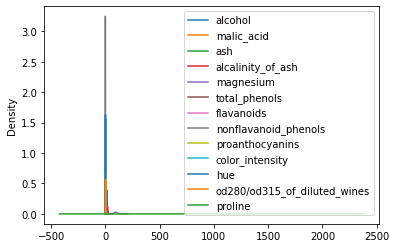

In [ ]:
dataset.plot.kde()

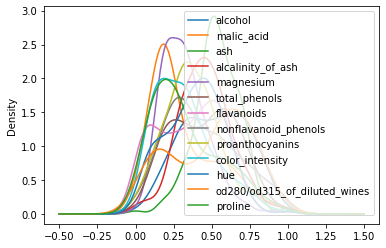

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
dataset_new = minmax.fit_transform(dataset)
dataset = pd.DataFrame(dataset_new, columns=iris.feature_names)
dataset.plot.kde()

In [ ]:
dataset

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


In [ ]:
dataset['class'] = wine.target
dataset

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529,2
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662,2
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290,2
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856,2


In [ ]:
X = dataset.iloc[ :, : -1].values
Y = dataset.iloc[ :, -1: ].values

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
train_frac = 0.9  #30%   left ->: 100-30 = 70%
valid_frac = 0.05/10 #(100/70)*10
test_frac = 0.05/10 #(100/70)*60

x_train, x_rem, y_train, y_rem = train_test_split(X, Y, train_size=train_frac)
x_valid, x_test, y_valid,  y_test = train_test_split(x_rem, y_rem,  test_size=test_frac)

In [ ]:
y_train = np.array(y_train).reshape(np.array(y_train).shape[0],)
# y_train[1]
# y_train = np.array(y_train).reshape(np.array(y_train).shape[0],)
# y

In [ ]:
y_train

array([0, 2, 1, 0, 1, 2, 2, 0, 0, 0, 0, 1, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 2, 0, 1, 2, 2, 0, 2, 2, 2, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 2, 1, 1, 0, 1, 0, 1, 1, 1, 0, 2, 0, 0, 2, 2, 0,
       1, 2, 1, 2, 2, 1, 2, 2, 2, 0, 1, 0, 2, 1, 0, 1, 1, 2, 2, 0, 0, 1,
       1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 2, 1, 1, 1, 1, 0, 1, 2, 0, 0, 2,
       1, 2, 2, 1, 0, 0, 1, 2, 2, 0, 0, 1, 1, 0, 2, 2, 2, 0, 1, 1, 0, 1,
       1, 1, 1, 2, 1, 0])

In [ ]:
y_train1 = np.where(y_train == 0, 1,0)
y_train2 = np.where(y_train == 1, 1,0)
y_train3 = np.where(y_train == 2, 1,0)
print(y_train1)
print(y_train2)
print(y_train3)


[1 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0
 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1
 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0
 0 1 0 0 1 0 0 0 0 0 0 1]
[0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0
 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0
 0 0 1 1 0 1 1 1 1 0 1 0]
[0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1
 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 1 1
 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1
 1 0 0 0 0 0 0 0 0 1 0 0]


In [ ]:
def sigmoid(z):
    # Activation function used to map any real value between 0 and 1
    return 1 / (1 + np.exp(-z))

def predict(weights, bias, X):
  linear_model = np.dot(X, weights) + bias
  y_predicted = sigmoid(linear_model)
  y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
  return np.array(y_predicted_cls)

# def net_input(theta, x):
#     # Computes the weighted sum of inputs
#     return np.dot(theta, x.T)

def probability(weights, bias, x):
    # Returns the probability after passing through sigmoid
    linear_model = (np.dot(x, weights) + bias)
    y_pred = sigmoid(linear_model)
    return y_pred

def cost_function(weights, bias, x, y):
    # Computes the cost function for all the training samples 
    m = x.shape[0]
    total_cost = 0
    h = probability(weights, bias, x)
    for i in range(m):
      total_cost += y[i] * np.log(h[i]) + (1 - y[i]) * np.log(1 - h[i])
    total_cost = -(total_cost/m);
    return total_cost

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred)
    accuracy = accuracy/len(y_true)
    return accuracy   

def batch_gradient_descent(X, y_true, epochs, learning_rate, rho):

    number_of_features = X.shape[1] #number of the feature
    # numpy array with 1 row and columns equal to number of features.
    weights = np.zeros(number_of_features)  
    bias = 0
    total_samples = X.shape[0] # number of rows in X
    
    cost_list = []
    epoch_list = []
    prev_jw = 100000
    
    for i in range(epochs+1):  
        y_predicted = sigmoid(np.dot(X, weights) + bias)  # = w1*x1 + w2*x2 + bias
        jw = cost_function(weights , bias, X, y_true)
        
        w_grad = (1/total_samples) * np.dot(X.T, (y_predicted - y_true))
        b_grad = (1/total_samples)*np.sum(y_predicted - y_true)
        
        weights -=  learning_rate * w_grad
        bias -=  learning_rate * b_grad
        
        # jw = np.mean(np.square(y_true-y_predicted)) # MSE (Mean Squared Error)
        if i%10==0:
            cost_list.append(jw)
            epoch_list.append(i)
        # print("Abs Difference = ", abs(prev_jw - jw))  
        # if abs(prev_jw - jw) <= rho:
          # print("dif = ", abs(prev_jw - jw))
          # break
        prev_jw = jw
        
    return weights, bias, jw, cost_list, epoch_list


def stochastic_gradient_descent(X, y_true, epochs, learning_rate, rho):
 
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    weights = np.ones(shape=(number_of_features)) 
    bias = 0
    total_samples = X.shape[0]
     
    #calculation of prev_jw
    prev_jw = 0
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs): 
        jw = 0   
        for j in range(total_samples): # random index from total samples
          sample_x = X[j]
          sample_y = y_true[j]
          y_predicted = sigmoid(np.dot(sample_x, weights) + bias)
          # y_predicted = np.dot(weights, sample_x.T) + bias
          jw = jw + (sample_y - y_predicted) ** 2

          w_grad =  np.dot(sample_x.T, (y_predicted - sample_y))
          b_grad =  np.sum(y_predicted - sample_y)

          # w_grad = (sample_x.T.dot(sample_y-y_predicted))
          # b_grad = (sample_y-y_predicted)
          
          weights = weights - learning_rate * w_grad
          bias = bias - learning_rate * b_grad
        
        jw = (jw)/(2*total_samples)
        
        # if i%100==0: # at every 100th iteration record the cost and epoch value
        cost_list.append(jw)
        epoch_list.append(i)
        if(abs(prev_jw - jw) < rho):
          break;
        prev_jw = jw
    return weights, bias, jw, cost_list, epoch_list



# weights, bias, cost, cost_list, epoch_list = batch_gradient_descent(x_train,np.array(y_train).reshape(np.array(y_train).shape[0],),50)



In [ ]:
alpha = [0.3]
rho = [0.00001]
epochs = [300]
for a, r, e in zip(alpha, rho, epochs):
  w, b, cost, cost_list, epoch_list = stochastic_gradient_descent(x_train,np.array(y_train1).reshape(np.array(y_train1).shape[0],), e, a, r)
  print("Alpha = ", a, "Epochs = ", e, "Rho = ", r)
  print("Train MSE : ", cost)
  print("-------------------------------------------")


Alpha =  0.3 Epochs =  300 Rho =  1e-05
Train MSE :  0.0007553197909306597
-------------------------------------------


In [ ]:
alpha = [0.3]
rho = [0.00001]
epochs = [300]
for a, r, e in zip(alpha, rho, epochs):
  w, b, cost, cost_list, epoch_list = stochastic_gradient_descent(x_train,np.array(y_train2).reshape(np.array(y_train2).shape[0],), e, a, r)
  print("Alpha = ", a, "Epochs = ", e, "Rho = ", r)
  print("Train MSE : ", cost)
  print("-------------------------------------------")


Alpha =  0.3 Epochs =  300 Rho =  1e-05
Train MSE :  0.0021926829061544684
-------------------------------------------


In [ ]:
alpha = [0.3]
rho = [0.00001]
epochs = [300]
for a, r, e in zip(alpha, rho, epochs):
  w, b, cost, cost_list, epoch_list = stochastic_gradient_descent(x_train,np.array(y_train3).reshape(np.array(y_train3).shape[0],), e, a, r)
  print("Alpha = ", a, "Epochs = ", e, "Rho = ", r)
  print("Train MSE : ", cost)
  print("-------------------------------------------")


Alpha =  0.3 Epochs =  300 Rho =  1e-05
Train MSE :  0.0009031961514642401
-------------------------------------------


In [ ]:
print(w)

[  3.5312276    3.50141061   4.84197283   3.18602492   2.50584296
  -1.78396907 -10.79550976  -0.26812835  -4.95703863   8.25926148
  -7.86944655  -9.35916507   1.04094631]


In [ ]:
print(b)

-2.2620286384941917


In [ ]:
print("Alpha = ", a, "Epochs = ", e, "Rho = ", r)

Alpha =  0.3 Epochs =  300 Rho =  1e-05


In [ ]:
ratio = 0.2
from sklearn.model_selection import train_test_split
import numpy as np
for i in range(5):
  print("\n############ Fold - ", i+1 , "----------------------Splitting of dataset with X:Y ratio of ",int(ratio*100)," :",int(100-ratio*100))
  x_trainf, x_testf, y_trainf, y_testf = train_test_split(x_train, y_train, test_size= ratio)
  y_trainf1 = np.where(y_trainf == 0, 1,0)
  y_trainf2 = np.where(y_trainf == 1, 1,0)
  y_trainf3 = np.where(y_trainf == 2, 1,0)
  y_testf1 = np.where(y_testf == 0, 1,0)
  y_testf2 = np.where(y_testf == 1, 1,0)
  y_testf3 = np.where(y_testf == 2, 1,0)
  alpha = [0.3]
  rho = [0.00001]
  epochs = [300]
  for a, r, e in zip(alpha, rho, epochs):
    w1, b1, cost1, cost_list1, epoch_list1 = stochastic_gradient_descent(x_trainf,np.array(y_trainf1).reshape(np.array(y_trainf1).shape[0],), e, a, r)
    print("Alpha = ", a, "Epochs = ", e, "Rho = ", r)
    print("Train Accuracy", accuracy(np.array(y_trainf1).reshape(np.array(y_trainf1).shape[0],), predict(w1, b1, x_trainf)))
    print("Test Accuracy", accuracy(np.array(y_testf1).reshape(np.array(y_testf1).shape[0],), predict(w1, b1, x_testf)))
    print("Class MSE : ", cost1)
    print("-------------------------------------------")
    w2, b2, cost2, cost_list2, epoch_list2 = stochastic_gradient_descent(x_trainf,np.array(y_trainf2).reshape(np.array(y_trainf2).shape[0],), e, a, r)
    print("Alpha = ", a, "Epochs = ", e, "Rho = ", r)
    print("Train Accuracy", accuracy(np.array(y_trainf2).reshape(np.array(y_trainf2).shape[0],), predict(w2, b2, x_trainf)))
    
    print("Train MSE : ", cost2)
    print("-------------------------------------------")
    # w3, b3, cost3, cost_list3, epoch_list3 = stochastic_gradient_descent(x_trainf,np.array(y_train3).reshape(np.array(y_trainf3).shape[0],), e, a, r)
    print("Alpha = ", a, "Epochs = ", e, "Rho = ", r)
    print("Accuracy", accuracy(np.array(y_trainf3).reshape(np.array(y_trainf3).shape[0],), predict(w3, b3, x_trainf)))
    print("Train MSE : ", cost3)
    print("-------------------------------------------")

    print(y_train1)
    print(y_train2)
    print(y_train3)

  # print("\nTraining dataset ---------------------------------------\n")
  # print(train)
  # print("\nTest dataset ---------------------------------------\n")
  # print(test)
  ratio += 0.2


############ Fold -  1 ----------------------Splitting of dataset with X:Y ratio of  20  : 80
Alpha =  0.3 Epochs =  300 Rho =  1e-05
Train Accuracy 1.0
Test Accuracy 0.96875
Class MSE :  0.0008587438253259658
-------------------------------------------
Alpha =  0.3 Epochs =  300 Rho =  1e-05
Train Accuracy 1.0
Train MSE :  0.0016763123380592662
-------------------------------------------
Alpha =  0.3 Epochs =  300 Rho =  1e-05
Accuracy 0.9765625
Train MSE :  0.00036399493044143643
-------------------------------------------
[1 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0
 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1
 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0
 0 1 0 0 1 0 0 0 0 0 0 1]
[0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 

ValueError: ignored